# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-01-30 08:58:58.291313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738227538.421567   20969 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738227538.455472   20969 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [19]:
# validation_set = tf.keras.utils.image_dataset_from_directory(
#     'valid',
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(128, 128),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False
# )
# class_name = validation_set.class_names
# print(class_name)

# Loading Model

In [12]:
cnn = tf.keras.models.load_model("../models/trained_plant_disease_model.keras")

#Visualising and Performing Prediction on Single image

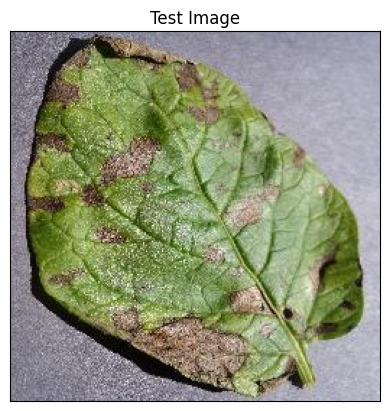

In [13]:
# Test Image Visualization
import cv2
image_path = "../datasets/Plant_Disease_Dataset/test/test/PotatoEarlyBlight1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [15]:
print(predictions)

[[4.7166866e-13 2.9702348e-17 3.5875485e-16 1.9132123e-17 1.4516905e-18
  1.9222983e-17 2.7372456e-19 3.1164066e-15 5.4298408e-15 2.5688201e-16
  2.9884329e-23 2.2221923e-19 1.6315002e-19 1.1598029e-16 6.5456466e-21
  1.8736306e-19 1.1146443e-16 1.2702537e-21 8.3577990e-16 3.7539069e-20
  1.0000000e+00 3.0115957e-12 1.6654131e-14 2.7297364e-20 2.0689566e-20
  1.1614688e-14 3.7149908e-11 1.5131059e-17 1.2516592e-19 1.3421866e-15
  1.3657566e-11 6.0403441e-17 1.1797437e-10 2.4465640e-21 1.9361468e-19
  9.3682284e-22 6.2134847e-21 4.2167129e-16]]


In [16]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


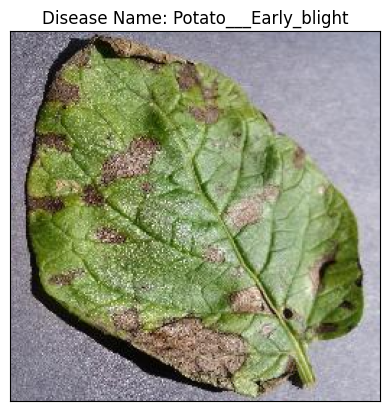

In [18]:
# Displaying the disease prediction
CLASS_NAMES = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Blueberry___healthy",
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy",
]

model_prediction = CLASS_NAMES[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()